## проект Телеком

### Описание проекта
Оператор свяхи "Ниединогоразрыва.ком" хочет научиться прогнозировать отток клиентов. Если выясниться, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

##Описание данных
* contract.csv - информация о договоре,
* personal.csv - персональные данные клиента,
* internet.csv - информация об интернет-услугах,
* phone.csv - информация об услугах телефонии.
_______________________________________________
* во всех файлах есть столбец customerID содержащий код клиента

##Исследование данных

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve



In [ ]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
try:
    contract = pd.read_csv('/content/drive/MyDrive/contract.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [ ]:
contract.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
381,6905-NIQIN,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Mailed check,50.65,50.65
3494,5569-KGJHX,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),85.35,754.65
2415,9898-KZQDZ,2016-06-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),94.55,3640.45
6232,9681-OXGVC,2019-07-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,100.50,514
5540,3803-KMQFW,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,20.55,20.55


In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
contract.BeginDate.value_counts()

2014-02-01    366
2019-11-01    237
2019-10-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

In [ ]:
contract.EndDate.value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [ ]:
try:
    personal = pd.read_csv('/content/drive/MyDrive/personal.csv')
except:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [ ]:
personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
3630,9986-BONCE,Female,0,No,No
2225,1153-GNOLC,Male,0,No,No
4915,2436-QBZFP,Female,0,Yes,Yes
6763,7471-MQPOS,Male,1,Yes,Yes
1444,5514-YQENT,Male,0,No,Yes


In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
try:
    internet = pd.read_csv('/content/drive/MyDrive/internet.csv')
except:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [ ]:
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2765,9028-LIHRP,Fiber optic,Yes,Yes,Yes,Yes,Yes,No
901,3452-ABWRL,Fiber optic,No,No,No,No,Yes,No
1126,5223-UZAVK,Fiber optic,Yes,Yes,No,No,Yes,Yes
4965,7148-XZPHA,Fiber optic,No,Yes,No,Yes,No,No
1653,2190-BCXEC,Fiber optic,No,No,No,Yes,No,No


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
try:
    phone = pd.read_csv('/content/drive/MyDrive/phone.csv')
except:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [ ]:
phone.sample(5)

,customerID,MultipleLines
6311,5981-ZVXOT,Yes
4987,1976-CFOCS,No
707,5676-CFLYY,No
236,6323-AYBRX,No
4278,1928-BXYIV,Yes


In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


После вывода информации по 4 таблицам, можно сказать, что пропуски отсутствуют. Пропуски появятся чуть позже, как только мы соединим таблицы, так как некоторые столбца уникальны и присутвуют только в некоторых таблицах.

In [ ]:
telecom = contract.merge(right=personal, on='customerID', how='outer')
telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No


In [ ]:
telecom = telecom.merge(right=phone, on='customerID', how='outer')
telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No


In [ ]:
telecom = telecom.merge(right=internet, on='customerID', how='outer')
telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


##План работы

* Предобработка данных - удалить не нужные колонки, заполнить пропуски, провести исследовательский анализ и избавиться от выбросов если есть
* Выбрать критерии, которые влияют на то, уйдет клиент или нет. Выделить целевой признак из даты EndDate, отдельным столбцом ушел ли человек или нет 1 или 0. Поделить данные на features и target
* Поделить features на обучающую и тестовую выборки в стандартом соотношении 0,75 - 0,25
* Произвести кодирование признаков, так как у нас задача классификации, то кодирование будет OHE
* Определить гиперпараметры с помощью кроссвалидации или Grid Search
* Обучить три модели, рассчитать ROC AUC и Accuracy 
* Модель, показавшуюю лучшие значения ROC AUC проверить на тестовой выборке
* Анализ финальной модели

In [ ]:
telecom.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
934,4198-VFOEA,2019-02-01,No,One year,Yes,Mailed check,33.60,435.45,Female,0,No,No,NaN,DSL,Yes,No,No,Yes,No,No
1445,3211-AAPKX,2018-06-01,No,Month-to-month,Yes,Mailed check,98.55,2031.95,Male,0,No,No,Yes,Fiber optic,No,No,No,Yes,Yes,Yes
169,1159-WFSGR,2018-10-01,No,Month-to-month,No,Electronic check,20.40,321.4,Female,0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4641,9895-VFOXH,2020-01-01,No,Month-to-month,No,Mailed check,24.40,24.4,Female,0,No,No,NaN,DSL,No,No,No,No,No,No
5996,5656-JAMLX,2014-12-01,No,Two year,No,Bank transfer (automatic),19.85,1253.65,Male,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,8168-UQWWF,2018-12-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),97.85,1105.4,Female,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
1708,8640-SDGKB,2019-08-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,74.40,299.7,Male,0,No,No,No,DSL,No,No,Yes,Yes,Yes,Yes
3903,5206-XZZQI,2015-09-01,No,Month-to-month,Yes,Mailed check,80.60,4348.1,Male,0,No,No,No,Fiber optic,No,Yes,No,Yes,No,No
1868,3961-SXAXY,2020-01-01,No,Month-to-month,Yes,Bank transfer (automatic),44.05,44.05,Male,0,No,No,No,DSL,No,No,No,No,No,No
5733,4817-KEQSP,2014-03-01,No,Two year,No,Bank transfer (automatic),19.85,1326.35,Female,0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Переименуем столбцы, чтобы было проще с ними работать

In [ ]:
telecom.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
telecom = telecom.rename(columns = {'customerID':'customer_id', 'BeginDate':'begin_date', 'EndDate':'end_date',
                          'Type':'type', 'PaperlessBilling':'paperless', 'PaymentMethod':'pay_method',
                          'MonthlyCharges':'month_charge', 'TotalCharges':'total_charge',
                          'SeniorCitizen':'citizen', 'Partner':'partner', 'Dependents':'dependents',
                          'MultipleLines':'multiple','InternetService':'internet', 'OnlineSecurity':'security',
                          'OnlineBackup':'backup', 'DeviceProtection':'protection','TechSupport':'tech_support',
                          'StreamingTV':'TV', 'StreamingMovies':'movies'})

In [ ]:
telecom.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7043 non-null   object 
 1   begin_date    7043 non-null   object 
 2   end_date      7043 non-null   object 
 3   type          7043 non-null   object 
 4   paperless     7043 non-null   object 
 5   pay_method    7043 non-null   object 
 6   month_charge  7043 non-null   float64
 7   total_charge  7043 non-null   object 
 8   gender        7043 non-null   object 
 9   citizen       7043 non-null   int64  
 10  partner       7043 non-null   object 
 11  dependents    7043 non-null   object 
 12  multiple      6361 non-null   object 
 13  internet      5517 non-null   object 
 14  security      5517 non-null   object 
 15  backup        5517 non-null   object 
 16  protection    5517 non-null   object 
 17  tech_support  5517 non-null   object 
 18  TV            5517 non-null 

### Заполним образовавшиеся при присоединении пропуски 'No'

In [ ]:
telecom.internet.value_counts()

Fiber optic    3096
DSL            2421
Name: internet, dtype: int64

In [ ]:
telecom.internet.unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [ ]:
#telecom.internet = telecom.internet.fillna('DSL')

In [ ]:
telecom.internet.value_counts()

Fiber optic    3096
DSL            2421
Name: internet, dtype: int64

In [ ]:
telecom.security.value_counts()

No     3498
Yes    2019
Name: security, dtype: int64

In [ ]:
telecom.security.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
telecom.internet = telecom.internet.fillna('other')

In [ ]:
telecom.multiple = telecom.multiple.fillna('No')

In [ ]:
telecom.security.value_counts()

No     3498
Yes    2019
Name: security, dtype: int64

In [ ]:
telecom.backup.value_counts()

No     3088
Yes    2429
Name: backup, dtype: int64

In [ ]:
telecom.security = telecom.security.fillna('No')

In [ ]:
telecom.backup = telecom.backup.fillna('No')

In [ ]:
telecom.protection.value_counts()

No     3095
Yes    2422
Name: protection, dtype: int64

In [ ]:
telecom.protection = telecom.protection.fillna('No')

In [ ]:
telecom.tech_support = telecom.tech_support.fillna('No')

In [ ]:
telecom.TV = telecom.TV.fillna('No')

In [ ]:
telecom.movies = telecom.movies.fillna('No')

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7043 non-null   object 
 1   begin_date    7043 non-null   object 
 2   end_date      7043 non-null   object 
 3   type          7043 non-null   object 
 4   paperless     7043 non-null   object 
 5   pay_method    7043 non-null   object 
 6   month_charge  7043 non-null   float64
 7   total_charge  7043 non-null   object 
 8   gender        7043 non-null   object 
 9   citizen       7043 non-null   int64  
 10  partner       7043 non-null   object 
 11  dependents    7043 non-null   object 
 12  multiple      7043 non-null   object 
 13  internet      7043 non-null   object 
 14  security      7043 non-null   object 
 15  backup        7043 non-null   object 
 16  protection    7043 non-null   object 
 17  tech_support  7043 non-null   object 
 18  TV            7043 non-null 

In [ ]:
telecom.paperless.value_counts()

Yes    4171
No     2872
Name: paperless, dtype: int64

In [ ]:
telecom = telecom.replace('Yes', 1)

In [ ]:
telecom.pay_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
telecom.pay_method.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: pay_method, dtype: int64

In [ ]:
telecom.paperless.unique()

array([1, 'No'], dtype=object)

In [ ]:
telecom['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

### Создадим новый столбец 'targ', который будет являться таргетом. 

В случае, если нет даты окончания пользования тарифом, предположим, что он еще пользуется им, и поставим 0. Если есть дата окончания, то ставим 1

In [ ]:
telecom['targ'] = telecom['end_date'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
telecom['targ'].value_counts()

0    5174
1    1869
Name: targ, dtype: int64

In [ ]:
telecom.type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
telecom_c = telecom.copy()

In [ ]:
telecom_c.end_date = telecom['end_date'].apply(lambda x: 0 if x == 'No' else 1)
telecom_c.end_date.value_counts()

0    5174
1    1869
Name: end_date, dtype: int64

Создадим новый стобец - количество дней пользования, пропуски заполним датой выгрузки данных - 1 февраля 2020 года

In [ ]:
telecom.loc[telecom.end_date=='No', 'end_date'] = '2020-02-01'

In [ ]:
telecom['begin_date'] = pd.to_datetime(telecom['begin_date'])

In [ ]:
telecom['end_date'] = pd.to_datetime(telecom['end_date'])

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   7043 non-null   object        
 1   begin_date    7043 non-null   datetime64[ns]
 2   end_date      7043 non-null   datetime64[ns]
 3   type          7043 non-null   object        
 4   paperless     7043 non-null   object        
 5   pay_method    7043 non-null   object        
 6   month_charge  7043 non-null   float64       
 7   total_charge  7043 non-null   object        
 8   gender        7043 non-null   object        
 9   citizen       7043 non-null   int64         
 10  partner       7043 non-null   object        
 11  dependents    7043 non-null   object        
 12  multiple      7043 non-null   object        
 13  internet      7043 non-null   object        
 14  security      7043 non-null   object        
 15  backup        7043 non-null   object  

In [ ]:
telecom['days'] = (telecom['end_date']-telecom['begin_date']).dt.days

In [ ]:
telecom.head()

,customer_id,begin_date,end_date,type,paperless,pay_method,month_charge,total_charge,gender,citizen,...,multiple,internet,security,backup,protection,tech_support,TV,movies,targ,days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,1,No,No,No,No,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,Male,0,...,No,DSL,1,No,1,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,...,No,DSL,1,1,No,No,No,No,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,1,No,1,1,No,No,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,1,61


Рассмотрим в гистограммах, как распределены значения, в разных параметрах

In [ ]:
telec_go = telecom_c.query("end_date == 1")
telec_stay = telecom_c.query("end_date == 0")

Гистограмма распределения клиентов разного типа 1. тех кто ушел 2. тех кто остался. Красным отображены те, кто ушел, голубым - оставшиеся

<AxesSubplot:>

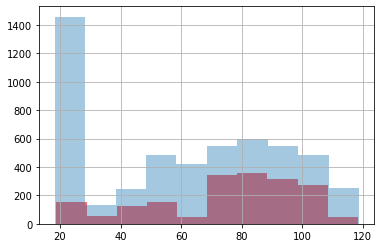

In [ ]:
telec_go.month_charge.hist(alpha = 0.6, color= 'r')
telec_stay.month_charge.hist(alpha = 0.4)

Вывод: Мы видим, что те клиенты, которые ушли, платили в среднем меньше в месяц чем те, кто остался. Однако мы не наблюдаем такого пика значений по небольшим оплатам от 20-30, как для оставшихся клиентов.

Гистограмма распределения месячной оплаты для всех клиентов 

<AxesSubplot:>

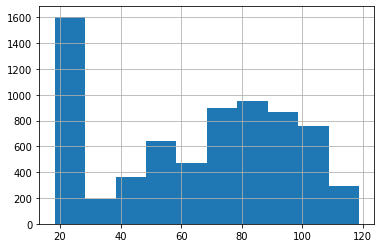

In [ ]:
telecom.month_charge.hist()
# ostalis = telecom['end_date'==0, 'month_charge']
# ostalis.hist() 

В основном месячная оплата не превышает 80, в большинстве случаев, месячная оплата ниже 30

<AxesSubplot:>

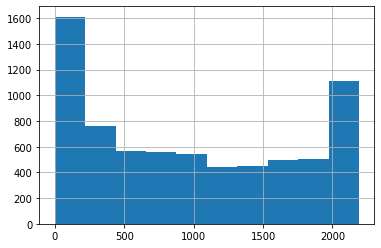

In [ ]:
telecom.days.hist()

In [ ]:
telecom.days

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: days, Length: 7043, dtype: int64

Создадим новый признак. Мы посчитали, что клиенты, кто платит в месяц больше 70 и пользуются мобильной связью больше 1500 дней, это наиболее стабильные и выгодные клиенты

In [ ]:
(telecom['days']>1500).sum()

2173

In [ ]:
((telecom['days'] > 1500)&(telecom['month_charge'] > 70)).sum()

1350

Создадим два новых признака 'cool', 'down'
* cool, те, кто платит больше 70 и пользуется услугами, больще 1500 дней - "сторожилы"
* down напротив, платят меньше, и пользуются услагми относительно недевно, меньше 250 дней.

In [ ]:
telecom['cool'] =  (telecom['days'] > 1200)&(telecom['month_charge'] > 80) 

In [ ]:
((telecom['days'] < 250)&(telecom['month_charge'] > 30)).sum()

1248

In [ ]:
telecom['down'] =  (telecom['days'] < 250)&(telecom['month_charge'] > 30) 

In [ ]:
telecom.tail(5)

,customer_id,begin_date,end_date,type,paperless,pay_method,month_charge,total_charge,gender,citizen,...,security,backup,protection,tech_support,TV,movies,targ,days,cool,down
7038,6840-RESVB,2018-02-01,2020-02-01,One year,1,Mailed check,84.80,1990.5,Male,0,...,1,No,1,1,1,1,0,730,False,False
7039,2234-XADUH,2014-02-01,2020-02-01,One year,1,Credit card (automatic),103.20,7362.9,Female,0,...,No,1,1,No,1,1,0,2191,True,False
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,1,Electronic check,29.60,346.45,Female,0,...,1,No,No,No,No,No,0,337,False,False
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,1,Mailed check,74.40,306.6,Male,1,...,No,No,No,No,No,No,1,123,False,True
7042,3186-AJIEK,2014-08-01,2020-02-01,Two year,1,Bank transfer (automatic),105.65,6844.5,Male,0,...,1,No,1,1,1,1,0,2010,True,False


In [ ]:
telecom.cool.value_counts()

False    5604
True     1439
Name: cool, dtype: int64

In [ ]:
telecom.cool = telecom.cool.astype(int)

In [ ]:
telecom.down = telecom.down.astype(int)

In [ ]:
telecom.tail(5)

,customer_id,begin_date,end_date,type,paperless,pay_method,month_charge,total_charge,gender,citizen,...,security,backup,protection,tech_support,TV,movies,targ,days,cool,down
7038,6840-RESVB,2018-02-01,2020-02-01,One year,1,Mailed check,84.80,1990.5,Male,0,...,1,No,1,1,1,1,0,730,0,0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,1,Credit card (automatic),103.20,7362.9,Female,0,...,No,1,1,No,1,1,0,2191,1,0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,1,Electronic check,29.60,346.45,Female,0,...,1,No,No,No,No,No,0,337,0,0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,1,Mailed check,74.40,306.6,Male,1,...,No,No,No,No,No,No,1,123,0,1
7042,3186-AJIEK,2014-08-01,2020-02-01,Two year,1,Bank transfer (automatic),105.65,6844.5,Male,0,...,1,No,1,1,1,1,0,2010,1,0


In [ ]:
telecom.cool.value_counts()

0    5604
1    1439
Name: cool, dtype: int64

Ранее мы заменили все пропуски на No,теперь заменим все значения No на 0

In [ ]:
telecom.head()

,customer_id,begin_date,end_date,type,paperless,pay_method,month_charge,total_charge,gender,citizen,...,security,backup,protection,tech_support,TV,movies,targ,days,cool,down
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,Female,0,...,No,1,No,No,No,No,0,31,0,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,Male,0,...,1,No,1,No,No,No,0,1036,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,...,1,1,No,No,No,No,1,61,0,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,1,No,1,1,No,No,0,1371,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,1,61,0,1


In [ ]:
telecom.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless',
       'pay_method', 'month_charge', 'total_charge', 'gender', 'citizen',
       'partner', 'dependents', 'multiple', 'internet', 'security', 'backup',
       'protection', 'tech_support', 'TV', 'movies', 'targ', 'days', 'cool',
       'down'],
      dtype='object')

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   7043 non-null   object        
 1   begin_date    7043 non-null   datetime64[ns]
 2   end_date      7043 non-null   datetime64[ns]
 3   type          7043 non-null   object        
 4   paperless     7043 non-null   object        
 5   pay_method    7043 non-null   object        
 6   month_charge  7043 non-null   float64       
 7   total_charge  7043 non-null   object        
 8   gender        7043 non-null   object        
 9   citizen       7043 non-null   int64         
 10  partner       7043 non-null   object        
 11  dependents    7043 non-null   object        
 12  multiple      7043 non-null   object        
 13  internet      7043 non-null   object        
 14  security      7043 non-null   object        
 15  backup        7043 non-null   object  

In [ ]:
telecom = telecom.replace('No', 0)

In [ ]:
telecom.targ.value_counts()

0    5174
1    1869
Name: targ, dtype: int64

In [ ]:
#telecom = telecom.join(pd.get_dummies(telecom['gender'], drop_first=True)).drop('gender', axis=1)
#telecom.head() 

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   7043 non-null   object        
 1   begin_date    7043 non-null   datetime64[ns]
 2   end_date      7043 non-null   datetime64[ns]
 3   type          7043 non-null   object        
 4   paperless     7043 non-null   int64         
 5   pay_method    7043 non-null   object        
 6   month_charge  7043 non-null   float64       
 7   total_charge  7043 non-null   object        
 8   gender        7043 non-null   object        
 9   citizen       7043 non-null   int64         
 10  partner       7043 non-null   int64         
 11  dependents    7043 non-null   int64         
 12  multiple      7043 non-null   int64         
 13  internet      7043 non-null   object        
 14  security      7043 non-null   int64         
 15  backup        7043 non-null   int64   

Рассмотрим, какие из признаков больше всего коррелируют со столбцами days и targ

In [ ]:
phik_overview = telecom.phik_matrix()
phik_overview.round(2)


interval columns not set, guessing: ['paperless', 'month_charge', 'citizen', 'partner', 'dependents', 'multiple', 'security', 'backup', 'protection', 'tech_support', 'TV', 'movies', 'targ', 'days', 'cool', 'down']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customer_id is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customer_id can be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable total_charge is large: 6531. Are you sure this is not an interval variable? Analysis for pairs of variables including total_charge can be slow.
  warnings.warn(


In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 16))
plt.tight_layout()

<div class="alert alert-info">удалила обычную корреляцию, сделала корреляцию Фика</div> 

удалим столбцы, которые нам не нужны, даты, индекс и пол (в таблице корреляции выдно, что целевой признак не зависит от пола)

In [ ]:
telecom = telecom.drop(columns=['customer_id','begin_date','end_date', 'gender'], axis=1)

Поделим значения на признаки и целевые показатели

In [ ]:
features = telecom.drop(['targ'], axis=1)
target = telecom.targ

In [ ]:
telecom.head()

Переведем категориальные признаки в числовые значения. Будем использовать Ordinal Encoder для моделей на основе деревьев и OneHotEncoding для линейных моделей

In [ ]:
telecom.type.value_counts()

In [ ]:
telecom.pay_method.value_counts()

In [ ]:
telecom.internet.value_counts()

In [ ]:
telecom.internet.value_counts()

In [ ]:
features["total_charge"] = pd.to_numeric(features.total_charge, errors='coerce')

In [ ]:
STATE = 101022

In [ ]:
#создадим выборки train и test   
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, 
                                                                            stratify=target, 
                                                                            random_state=STATE)

In [ ]:
features.info()

In [ ]:
cols = ['type', 'pay_method', 'internet']
encoder = OrdinalEncoder()
new_features = features_train[cols]
new_features = pd.DataFrame(encoder.fit_transform(new_features), 
                            columns=new_features.columns, 
                            index=new_features.index)
features_ordinal_train = features_train.copy()
for i in cols:
  features_ordinal_train[i] = new_features[i]
features_ordinal_train

In [ ]:
cols = ['type', 'pay_method', 'internet']
encoder = OrdinalEncoder()
new_features = features_test[cols]
new_features = pd.DataFrame(encoder.fit_transform(new_features), 
                            columns=new_features.columns, 
                            index=new_features.index)
features_ordinal_test = features_test.copy()
for i in cols:
  features_ordinal_test[i] = new_features[i]

In [ ]:
features_ordinal_test.total_charge = features_ordinal_test.total_charge.fillna(0)

In [ ]:
features_ohe_train = pd.get_dummies(features_train, drop_first=True)
features_ohe_train.head()

In [ ]:
features_ohe_train.isnull().sum()

In [ ]:
features_ohe_train.total_charge = features_ohe_train.total_charge.fillna(0)

In [ ]:
features_ohe_test = pd.get_dummies(features_test, drop_first=True)


In [ ]:
features_ohe_test.total_charge = features_ohe_test.total_charge.fillna(0)

заполним медианным значением пропуски, которые у нас появилилсь в total_charge, после изменения типа данных

In [ ]:
#features_ordinal.total_charge = features_ordinal.total_charge.fillna(0)

In [ ]:
#obj = obj.columns
#bool_columns = ['type', 'pay_method', 'internet']

In [ ]:
#quant_columns = ['paperless', 'month_charge', 'total_charge', 'citizen', 'partner', 'dependents', 'backup', 'protection',
                 'tech_support', 'TV', 'movies', 'days', 'cool', 'down']

In [ ]:
scaler = StandardScaler()
#scaler.fit(features_ordinal_train[quant_columns])

In [ ]:
scaler.fit(features_ordinal_train)
#features_ordinal_train = scaler.transform(features_ordinal_train)
features_ordinal_test = scaler.transform(features_ordinal_test)

In [ ]:
features_ordinal_train.isnull().sum()

In [ ]:
features_ordinal_train.total_charge = features_ordinal_train.total_charge.fillna(0)

In [ ]:
scaler = StandardScaler()
scaler.fit(features_ohe_train)

In [ ]:
features_ohe_test = scaler.transform(features_ohe_test)

Попробуем подобрать гиперпараметры с помощью GridSearch для трех моделей: Logistic Regression, SGDClassifier, Random Forest Classifier

## Логистическая регрессия

In [ ]:
model_lr =LogisticRegression(random_state=STATE, solver='lbfgs')

In [ ]:
params_lr = {
           'class_weight':['balanced'],
           'C':[3],
           'max_iter':[500]}  

In [ ]:
grid_lr = GridSearchCV(model_lr, param_grid=params_lr, scoring='roc_auc',verbose=3, cv=5)

In [ ]:
grid_lr.fit(features_ohe_train, target_train) 

In [ ]:
grid_lr.best_score_

In [ ]:
grid_lr.best_params_

## SGDClassifier

In [ ]:
classifier = SGDClassifier(random_state = STATE, tol=1e-3)

In [ ]:
parameters_grid = {
       'alpha' : np.linspace(0.00001, 0.00005, 15),
       'learning_rate': ['optimal', 'constant', 'invscaling'],
       'max_iter' : np.arange(5,8),
   }

In [ ]:
grid_cv = GridSearchCV(classifier, parameters_grid, scoring = 'roc_auc', cv = 5)
grid_cv.fit(features_ordinal_train, target_train)

In [ ]:
grid_cv.best_score_

In [ ]:
grid_cv.best_params_

## Random Forest Classifier

In [ ]:
param_grid = {'n_estimators': [300],
              'max_depth': [5, 7, 9],
              'max_features': [3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [2, 4, 6],
             }

model_rf = RandomForestClassifier(random_state = STATE)
grid_cv_rf = GridSearchCV(estimator = model_rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2,
                           scoring = 'roc_auc')
grid_cv_rf.fit(features_ordinal_train, target_train)

In [ ]:
grid_cv_rf.best_score_

In [ ]:
grid_cv_rf.best_params_

In [ ]:
RF_best_params = grid_cv_rf.best_params_

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

In [ ]:
# Функции, которые в дальнейшем понадобятся
def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(features_ordinal_train, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
        
    else:
        raise KeyError('Unknown model_type')

def grid_search(model, gs_params):
    '''Функция для подбора гиперпараметров с помощью перекрёстной проверки'''
     
    gs = GridSearchCV(estimator=model, param_grid=gs_params, refit=True,
                      scoring='roc_auc', n_jobs=-1, cv=skf, verbose=0)
    gs.fit(X, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(5)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    return gs
        



In [ ]:
features_ordinal_train.columns

In [ ]:
rf = Pipeline([('rf', RandomForestClassifier(n_jobs=-1, 
                                             class_weight='balanced', 
                                             random_state=STATE))])

# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=STATE)

scores = cross_val_score(estimator=rf, X=features_ordinal_train, y=target_train, 
                         cv=skf, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

# важность признаков
plot_features_scores(model=rf, data=features_ordinal_train, target=target_train, column_names=features_ordinal_train.columns, model_type='rf')

Предварительно, лучшие результаты показала модель Random Forest ее же мы используем, для проверки на тестовой выборке

## Проверка на тестовой выборке

In [ ]:
model_rf = RandomForestClassifier()
model_rf.set_params(**RF_best_params)
model_rf.fit(features_ordinal_test, target_test)

In [ ]:
probabilities_test = model_rf.predict_proba(features_ordinal_test)
probabilities_one_valid = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

In [ ]:
auc_roc

## Отчет по проделанной работе

Меня зовут Юлия Ларина и это презентация Выпускного проекта "Телеком" для финального спринта курса Data Scientist.

### Цель проекта 

Построить модель классификации для предсказания оттока клиентов для телеком компании. В качестве ключевой метрики использовать Roc-Auc выше 0,85. Данные были выгружены 20 февраля 2020 года

### План проекта

* Предобработка данных - удалить не нужные колонки, заполнить пропуски, провести исследовательский анализ и избавиться от выбросов если есть
* Выбрать критерии, которые влияют на то, уйдет клиент или нет. Выделить целевой признак из даты EndDate, отдельным столбцом ушел ли человек или нет 1 или 0. Поделить данные на features и target
* Поделить features на обучающую и тестовую выборки в стандартом соотношении 0,75 - 0,25
* Произвести кодирование признаков, так как у нас задача классификации, то кодирование будет OHE
* Определить гиперпараметры с помощью кроссвалидации или Grid Search
* Обучить три модели, рассчитать ROC AUC и Accuracy
* Модель, показавшуюю лучшие значения ROC AUC проверить на тестовой выборке
* Анализ финальной модели

### Ход работы

1. Во время предобработки данных были удалены ненужные колонки заполнены пропуски а также был проведён исследовательский анализ для того чтобы избавиться от выбросов. Мы обнаружили что пропуски в данных отсутствовали и смогли соединить между собой четыре таблицы с помощью функции merge по столбцу customer_id. После объединения таблицы так как каждая таблица имела различное количество строк, то в итоговой таблицы образовались пропуски, самое большое количество строк было 7043 самое маленькое количество строк было 5517. Было принято решение заполнить пропуски с помощью "No"

2. Следующим шагам необходимо было определить целевые признаки и фичи для формирования целевого признака. целевой признак формировался следующим образом: если дата ухода клиента из Телеком есть, значит он ушел, значит = 1, если даты нет, значит он остался с Телеком это = 0. Так сформировался целевой признак targ

Также были сформированы другие признаки. Первый признак это количество дней сколько клиент пользовался услугами компании. Он расчитывался по разнице между датой прихода - begin_date и даты ухода - end_date. Следующий признак касался VIP клиентов, это те люди которым находились в Телекоме больше 1500 дней и месячный платёж их составлял больше 80. Следующий признак это обратный от VIP клиентов, он формировался если человек находился пользовался услугами меньше 200 дней и в ежемесячный платёж составлял меньше 20, то есть не надёжные клиенты.

На графике мы видим разницу в пользователях которые ушли из компании или остались в ней. На графике отображены временные промежутки когда клиент находился в компании, а также его месячный платёж.

![image.png](attachment:image.png)

3. Далее, необходимо было понять какие признаки наиболее важны для формирования таргета. У нас пристусвую бинарные категориальные признаки, поэтому мы воспользовались коэфицентом Спирмена и библиотекой Phik. И отобразили результаты на температурный диаграмме. Благодаря выявленный корреляци, мы определили, что признак gender не влияет на целевой признак. Поэтому для итоговых признаков мы удалили целый столбец этого признака. Также были удалены столбце Customer_id, begin_date, и and_date. Далее все признаки были поделены на features и target в качестве таргета мы использовали столбец "targ"   

![image.png](attachment:image.png)

4. После отделения признаков на выборки в соотношений 0,25 к 0,75 мы должны были произвести кодирования признаков. В качестве кодирования признаков мы использовали два метода первый из которых OHE и второй Ordinal Encoding. тип кодирования признаков определялся из выбора моделей для предсказаний. Для линейных моделей лучше использовать OHE. После проведения кодирования признаков мы также произвели масштабирование признаков. Признаках присутствовал небольшой дисбаланс классов поэтому при делении на выборки мы установили параметр stratify=target

5. Далее мы определили лучшие гипер параметры для каждой из трёх моделей с помощью Grid Search в качестве модели были использованы такие как Linear Regression, SGDClassifier, и Random Forest Classifier.

6. Мы обучили три разные модели на выборки train которые были предварительно кодированные с помощью разных методик кодировки. По результатам обучения модели, лучшие результаты показала модель Random Forest Classifier. Для тестирования тестовый выборки мы использовали именно эту модель. Мерика качества модели auc-ruc на тестовой выборке показала значение 0,97.

7. Согласно рекомендации тимлида, мы определили какие все же из показателей повлияли на предсказания модели и расположили их в порядке приорететности

![image.png](attachment:image.png)

ВЫВОД: модель Random Forest Classifier на тестовой выборке показала невероятно высокие значения метрики roc-auc поэтому лучшим из решением было бы проверить также другие метрике качества такие как матрица ошибок, F1 и accuracy. В целом, можно сделать заключение, что цель проекта достигнута и модель для классификации клиентов по признаку ушел или остался в компании достигнута. Компания сможет предсказывать поведение клиентов, тем самым предлагая им лучшие из условий заранее.